1.Tiền xử lý dữ liệu
1.1 Nhập dữ liệu
1.1.1Import thư viện

In [70]:
import numpy as np      
import pandas as pd    
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

1.1.2. Import file csv

In [71]:
pd.options.display.max_columns=100
df_store = pd.read_csv('./stores.csv')
df_train = pd.read_csv('./train.csv') 
df_features = pd.read_csv('./features.csv')

1.2.Kết 3 file csv và xóa thuộc tính trùng

In [72]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [73]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,2,2/5/2010,50605.27,False
2,1,3,2/5/2010,13740.12,False
3,1,4,2/5/2010,39954.04,False
4,1,5,2/5/2010,32229.38,False


In [74]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [75]:
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [76]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) 

In [77]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [78]:
df.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [79]:
df.shape

(421570, 16)

2.Kiểm tra từng thuộc tính trong dataset
2.1. Store và Department

In [80]:
df['Store'].nunique() 

45

In [81]:
df['Dept'].nunique() 

81

In [82]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept', values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

In [83]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2/19/2010,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,3/12/2010,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,10/8/2010,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,1/21/2011,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,3/11/2011,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,5/25/2012,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,6/29/2012,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,8/3/2012,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,8/31/2012,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


In [84]:
df = df.loc[df['Weekly_Sales'] > 0]

In [85]:
df.shape

(420212, 16)

2.2 IsHoliday

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

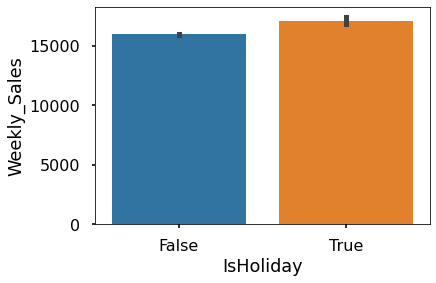

In [86]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [87]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2/12/2010', '9/10/2010', '11/26/2010', '12/31/2010', '2/11/2011',
       '9/9/2011', '11/25/2011', '12/30/2011', '2/10/2012', '9/7/2012'],
      dtype=object)

In [88]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [89]:
df.loc[(df['Date'] == '2/12/2010')|(df['Date'] == '2/11/2011')|(df['Date'] == '2/10/2012'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2/12/2010')&(df['Date'] != '2/11/2011')&(df['Date'] != '2/10/2012'),'Super_Bowl'] = False

In [90]:
df.loc[(df['Date'] == '9/10/2010')|(df['Date'] == '9/9/2011')|(df['Date'] == '9/7/2012'),'Labor_Day'] = True
df.loc[(df['Date'] != '9/10/2010')&(df['Date'] != '9/9/2011')&(df['Date'] != '9/7/2012'),'Labor_Day'] = False

In [91]:
df.loc[(df['Date'] == '11/26/2010')|(df['Date'] == '11/25/2011'),'Thanksgiving'] = True
df.loc[(df['Date'] != '11/26/2010')&(df['Date'] != '11/25/2011'),'Thanksgiving'] = False

In [92]:
df.loc[(df['Date'] == '12/31/2010')|(df['Date'] == '12/30/2011'),'Christmas'] = True
df.loc[(df['Date'] != '12/31/2010')&(df['Date'] != '12/30/2011'),'Christmas'] = False

In [93]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False


<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

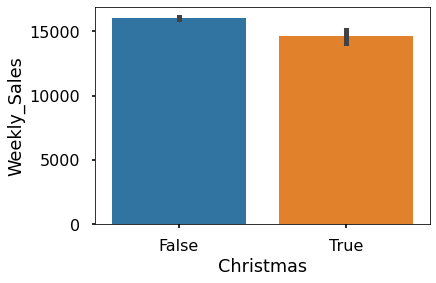

In [94]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

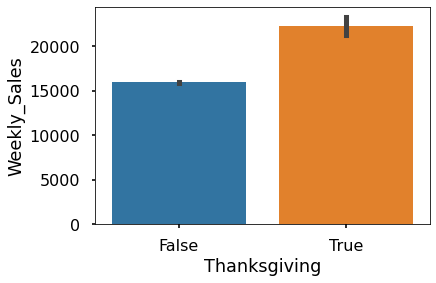

In [95]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) 

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

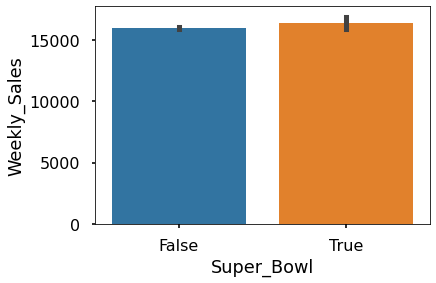

In [96]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) 

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

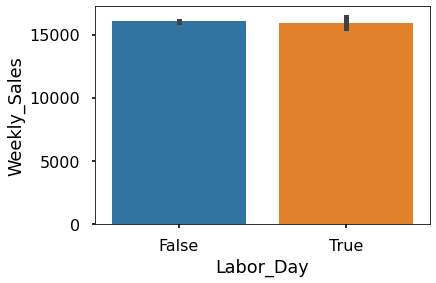

In [97]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) 

2.3 Type

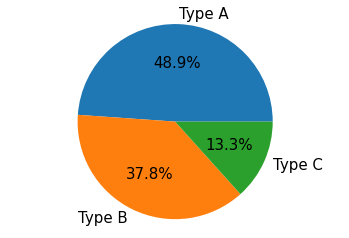

In [98]:
my_data = [48.88, 37.77 , 13.33 ]  
my_labels = 'Type A','Type B', 'Type C' 
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) 
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) 
plt.show()

In [99]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

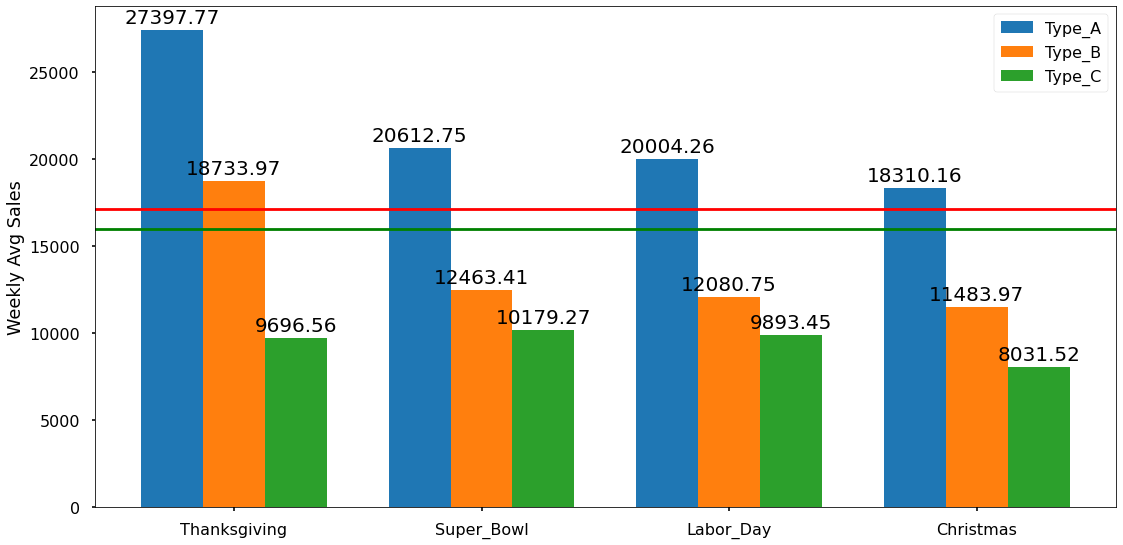

In [100]:
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  
width = 0.25 

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r')
plt.axhline(y=15952.82,color='green') 

fig.tight_layout()

plt.show()

In [101]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,11/26/2010,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,11/25/2011,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,11/25/2011,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,11/26/2010,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,11/26/2010,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


2.4 Size

In [102]:
df_store.groupby('Type').describe()['Size'].round(2) 

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


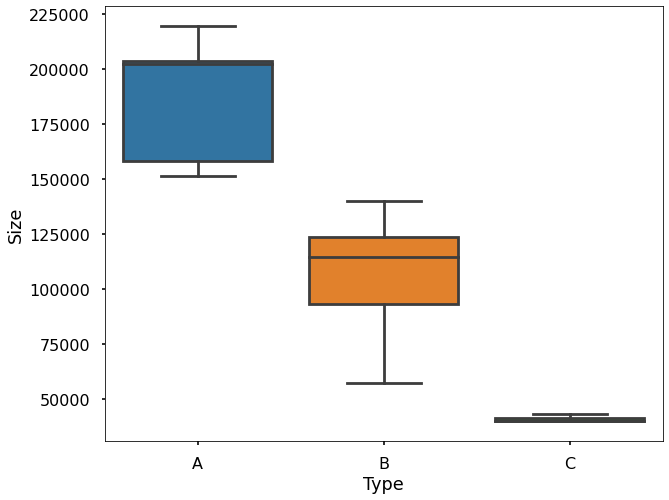

In [103]:
plt.figure(figsize=(10,8)) 
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

2.5 Markdown

In [104]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [105]:
df = df.fillna(0) 

In [106]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [107]:
df.describe() 

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


2.6 Fuel Price, CPI , Unemployment , Temperature Effects

<AxesSubplot:xlabel='Fuel_Price'>

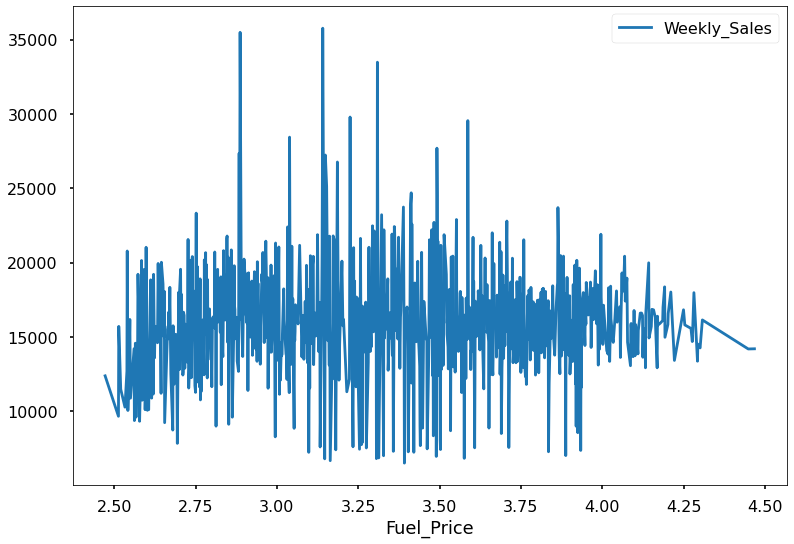

In [108]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='Temperature'>

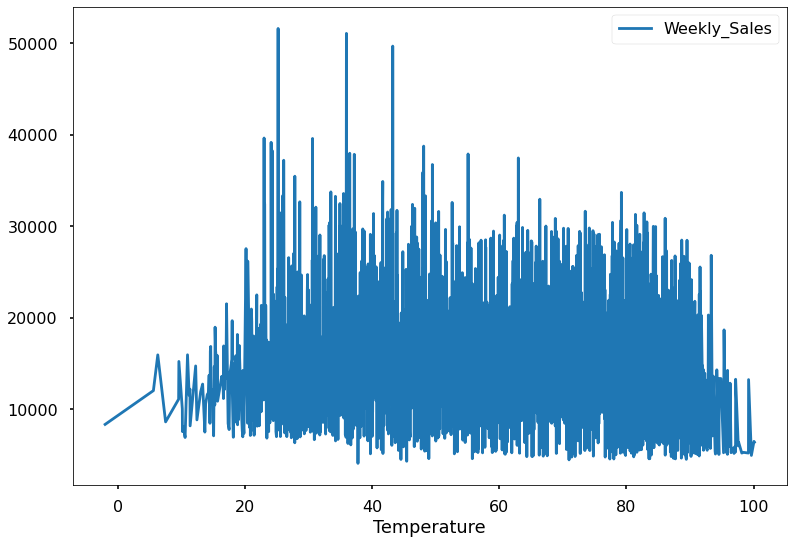

In [109]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot:xlabel='CPI'>

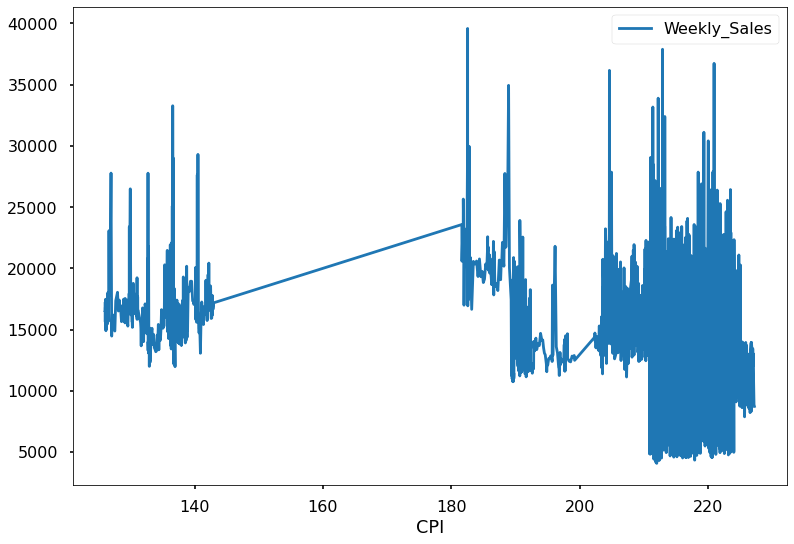

In [110]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<AxesSubplot:xlabel='Unemployment'>

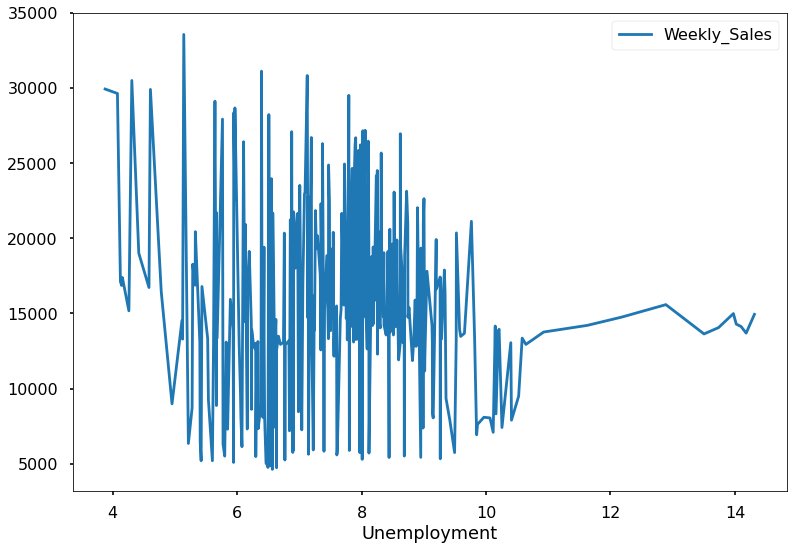

In [111]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

2.7 Date

In [112]:
df['Date'].head(5).append(df['Date'].tail(5))

0           2/5/2010
1           2/5/2010
2           2/5/2010
3           2/5/2010
4           2/5/2010
421565    10/26/2012
421566    10/26/2012
421567    10/26/2012
421568    10/26/2012
421569    10/26/2012
Name: Date, dtype: object

In [113]:
df["Date"] = pd.to_datetime(df["Date"]) 
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [114]:
df.groupby('month')['Weekly_Sales'].mean() 

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [115]:
df.groupby('year')['Weekly_Sales'].mean() 

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

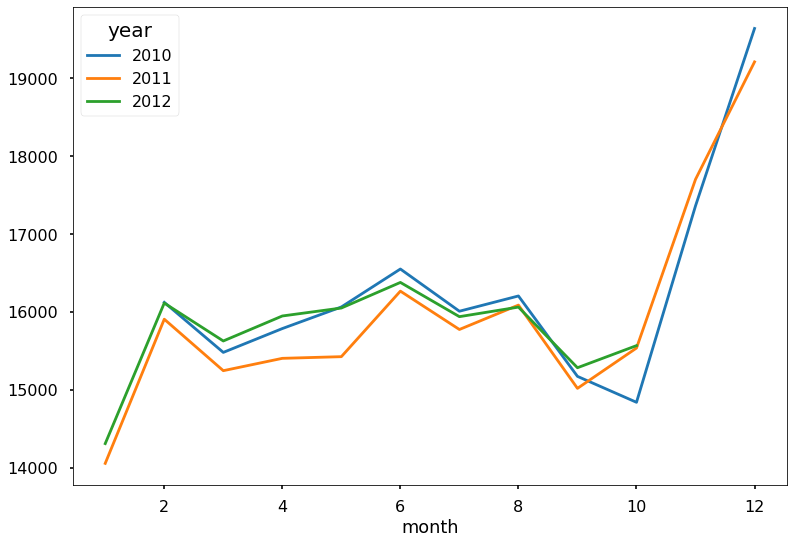

In [116]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

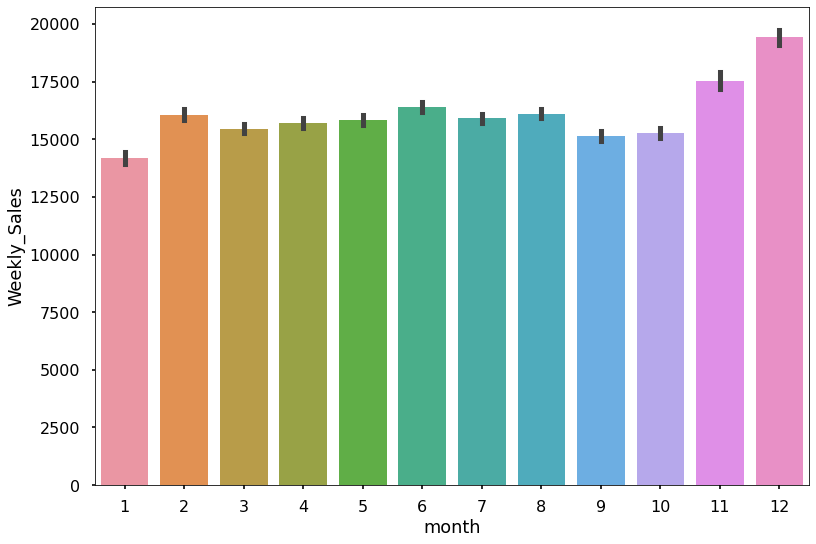

In [117]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

In [118]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='week'>

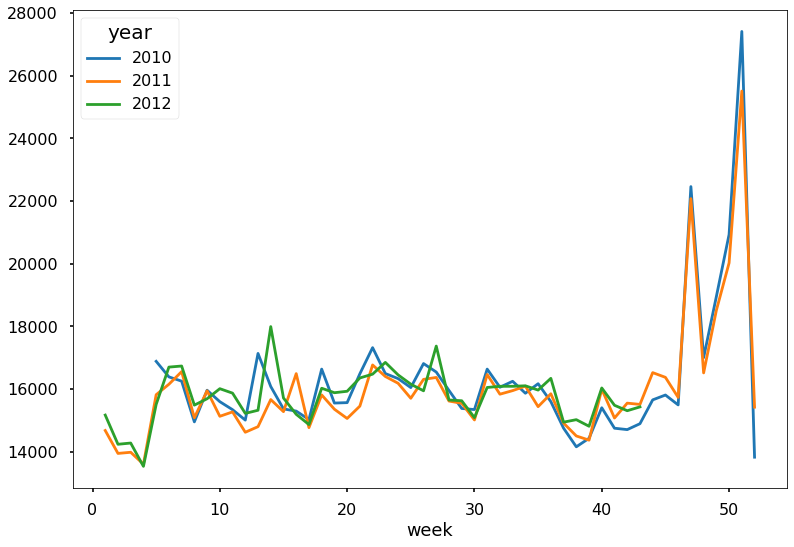

In [119]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

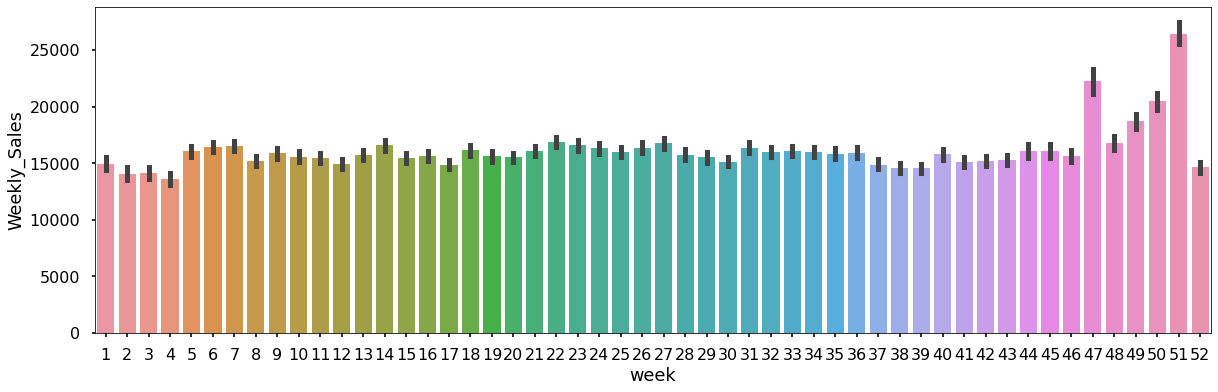

In [120]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

2.8 Xuất file csv

In [121]:
type_group = {'A':1, 'B': 2, 'C': 3}  
df['Type'] = df['Type'].replace(type_group)


In [122]:
df['Date'] = pd.to_datetime(df['Date']) 


In [123]:
df['Super_Bowl'] = df['Super_Bowl'].astype(bool).astype(int) 


In [124]:
df['Thanksgiving'] = df['Thanksgiving'].astype(bool).astype(int) 


In [125]:
df['Labor_Day'] = df['Labor_Day'].astype(bool).astype(int) 


In [126]:
df['Christmas'] = df['Christmas'].astype(bool).astype(int) 


In [127]:
df['IsHoliday'] = df['IsHoliday'].astype(bool).astype(int) 


In [128]:
df["Date"] = pd.to_datetime(df["Date"]) 

In [129]:
df.set_index('Date', inplace=True) 

In [130]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2010-02-05,1,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010


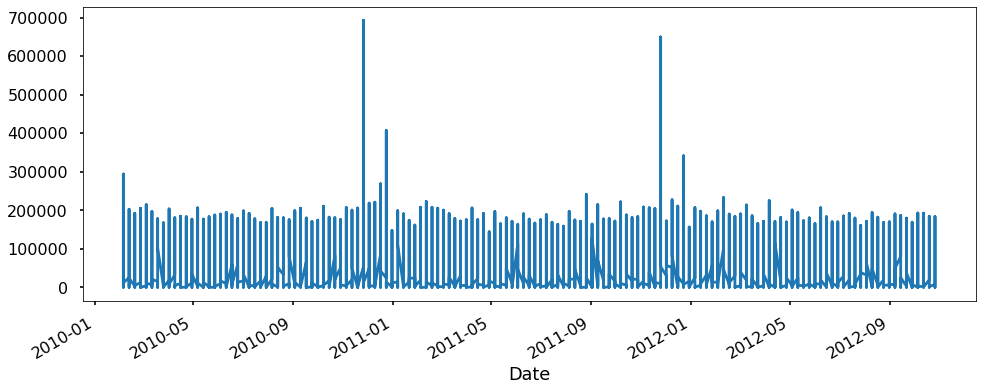

In [131]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [132]:
df_week = df.resample('W').mean()

In [133]:
df_week.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.040394,44.161236,16887.602166,0.0,33.282800,2.717968,0.0,0.0,0.0,0.0,0.0,167.328549,8.578592,1.587916,137381.684997,0.0,0.0,0.0,0.0,5.0,2.0,2010.0
2010-02-14,22.006443,44.331638,16390.912208,1.0,33.370444,2.695955,0.0,0.0,0.0,0.0,0.0,167.401961,8.567855,1.584944,137675.080027,1.0,0.0,0.0,0.0,6.0,2.0,2010.0
2010-02-21,22.044444,44.287542,16255.185970,0.0,37.032596,2.673506,0.0,0.0,0.0,0.0,0.0,167.386208,8.574593,1.587879,137277.810101,0.0,0.0,0.0,0.0,7.0,2.0,2010.0
2010-02-28,22.021088,44.058844,14955.932194,0.0,38.624806,2.685486,0.0,0.0,0.0,0.0,0.0,167.708233,8.562094,1.587755,137365.977551,0.0,0.0,0.0,0.0,8.0,2.0,2010.0
2010-03-07,22.056199,44.019755,15964.821240,0.0,42.367490,2.731923,0.0,0.0,0.0,0.0,0.0,167.680036,8.573890,1.585831,137556.273161,0.0,0.0,0.0,0.0,9.0,3.0,2010.0


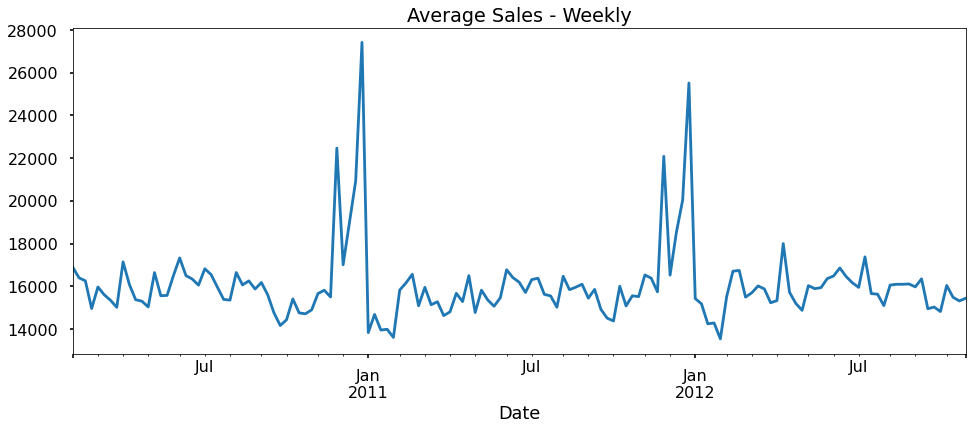

In [134]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [135]:
df_month = df.resample('MS').mean() 

In [136]:
df_month.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-01,22.028124,44.210080,16123.339183,0.249809,35.578510,2.693193,0.0,0.0,0.0,0.0,0.0,167.455953,8.570795,1.587124,137424.932232,0.249809,0.0,0.0,0.0,6.500127,2.0,2010.0
2010-03-01,22.076498,44.068584,15480.222209,0.000000,46.695948,2.786435,0.0,0.0,0.0,0.0,0.0,167.557149,8.574451,1.588325,137338.023230,0.000000,0.0,0.0,0.0,10.500000,3.0,2010.0
2010-04-01,22.087864,44.149396,15786.479121,0.000000,56.409791,2.867522,0.0,0.0,0.0,0.0,0.0,167.255377,8.446639,1.588035,137358.674534,0.000000,0.0,0.0,0.0,14.993929,4.0,2010.0
2010-05-01,22.149273,44.298116,16063.976174,0.000000,64.884550,2.917179,0.0,0.0,0.0,0.0,0.0,167.267314,8.451819,1.585047,137351.455218,0.000000,0.0,0.0,0.0,19.496860,5.0,2010.0
2010-06-01,22.218080,44.227551,16551.606753,0.000000,74.595153,2.787978,0.0,0.0,0.0,0.0,0.0,167.634269,8.452569,1.587086,136958.451916,0.000000,0.0,0.0,0.0,23.501593,6.0,2010.0


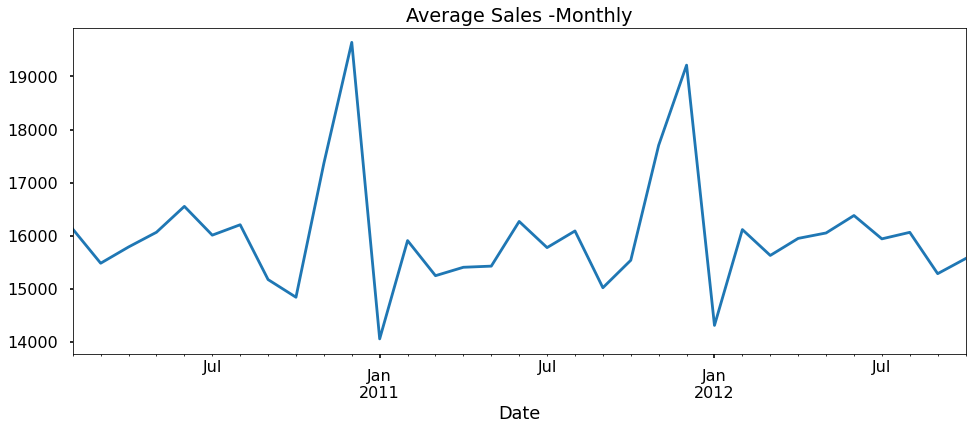

In [137]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales -Monthly')
plt.show()

In [138]:
df.to_csv('walmart_sales.csv') 